<a href="https://colab.research.google.com/github/MavielS/classification-biens-de-consommation/blob/master/CV_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problématique** <br>
Peut-on catégoriser les produits de ce dataset avec leur image et leur description ? <br>

**Objectif du projet**: <br>
Votre mission est de réaliser une première **étude de faisabilité** d'un moteur de classification d'articles basé sur une image et une description pour **l'automatisation de l'attribution de la catégorie de l'article**. <br>

Vous analyserez le jeu de données en réalisant un **prétraitement** des images et des descriptions des produits, une **réduction de dimension**, puis un **clustering**. <br>
Les résultats du clustering seront présentés sous la forme d’une **représentation en deux dimensions** à déterminer, qui illustrera le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.

**Objectif du notebook**: <br>

Ce notebook se concentre uniquement sur l'extraction de features des images. On utilisera dans un premier temps des descripteurs SIFT pour créer un Bag of Visual Words décrivant chacune de nos images. Ce BoVW sera évalué grâce au score ARI (Adjusted Rand Index).<br> L'on extraiera en outre les features en utilisant un CNN pré-entrainé pour  comparer les 2 approches.
On analysera en outre la séparation des clusters à l'aide d'un TSNE. <br>

Tout comme pour la partie NLP, l'on conclura sur la faisabilité puis on ouvrira en montrant que les outils de classification supervisée sont bien plus adaptés dans notre situation (présence de labels) à l'aide d'une Random Forest. <br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Récupération-des-données" data-toc-modified-id="Récupération-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Récupération des données</a></span><ul class="toc-item"><li><span><a href="#Catégories" data-toc-modified-id="Catégories-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Catégories</a></span></li><li><span><a href="#Images" data-toc-modified-id="Images-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Images</a></span></li></ul></li><li><span><a href="#Approche-non-supervisée" data-toc-modified-id="Approche-non-supervisée-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Approche non-supervisée</a></span><ul class="toc-item"><li><span><a href="#Prétraitements" data-toc-modified-id="Prétraitements-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Prétraitements</a></span></li><li><span><a href="#Extraction-de-features-avec-SIFT" data-toc-modified-id="Extraction-de-features-avec-SIFT-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Extraction de features avec SIFT</a></span><ul class="toc-item"><li><span><a href="#Sans-preprocessing" data-toc-modified-id="Sans-preprocessing-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Sans preprocessing</a></span><ul class="toc-item"><li><span><a href="#BoVW" data-toc-modified-id="BoVW-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>BoVW</a></span></li><li><span><a href="#Analyse-visuelle-de-la-séparation" data-toc-modified-id="Analyse-visuelle-de-la-séparation-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Analyse visuelle de la séparation</a></span></li><li><span><a href="#Analyse-quantitative-de-la-séparation" data-toc-modified-id="Analyse-quantitative-de-la-séparation-2.2.1.3"><span class="toc-item-num">2.2.1.3&nbsp;&nbsp;</span>Analyse quantitative de la séparation</a></span></li></ul></li><li><span><a href="#Avec-preprocessing" data-toc-modified-id="Avec-preprocessing-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Avec preprocessing</a></span></li></ul></li><li><span><a href="#Extraction-de-features-avec-ORB" data-toc-modified-id="Extraction-de-features-avec-ORB-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Extraction de features avec ORB</a></span></li><li><span><a href="#Extraction-de-features-avec-du-transfer-learning" data-toc-modified-id="Extraction-de-features-avec-du-transfer-learning-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Extraction de features avec du transfer learning</a></span><ul class="toc-item"><li><span><a href="#Prétraitements" data-toc-modified-id="Prétraitements-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Prétraitements</a></span></li><li><span><a href="#256x256" data-toc-modified-id="256x256-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>256x256</a></span></li><li><span><a href="#512x512" data-toc-modified-id="512x512-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>512x512</a></span></li><li><span><a href="#Avec-filtre-gaussien" data-toc-modified-id="Avec-filtre-gaussien-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Avec filtre gaussien</a></span></li></ul></li></ul></li><li><span><a href="#Approche-supervisée" data-toc-modified-id="Approche-supervisée-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Approche supervisée</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#SIFT" data-toc-modified-id="SIFT-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>SIFT</a></span></li><li><span><a href="#ORB" data-toc-modified-id="ORB-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>ORB</a></span></li><li><span><a href="#Transfer-Learning" data-toc-modified-id="Transfer-Learning-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Transfer Learning</a></span><ul class="toc-item"><li><span><a href="#256x256" data-toc-modified-id="256x256-3.1.3.1"><span class="toc-item-num">3.1.3.1&nbsp;&nbsp;</span>256x256</a></span></li><li><span><a href="#512x512" data-toc-modified-id="512x512-3.1.3.2"><span class="toc-item-num">3.1.3.2&nbsp;&nbsp;</span>512x512</a></span></li></ul></li></ul></li><li><span><a href="#Approche-Deep-Learning" data-toc-modified-id="Approche-Deep-Learning-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Approche Deep Learning</a></span><ul class="toc-item"><li><span><a href="#Création-des-folders" data-toc-modified-id="Création-des-folders-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Création des folders</a></span></li></ul></li><li><span><a href="#EfficientNet" data-toc-modified-id="EfficientNet-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>EfficientNet</a></span></li></ul></li></ul></div>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

import cv2 as cv
from PIL import Image

from p6_utils import display_thumbnails_from_df, preproc_image

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

pd.set_option('plotting.backend', 'plotly')
pd.set_option("display.min_rows", 10)
pd.set_option("display.max_columns", 50)
pd.set_option("max_colwidth", 100)


%reload_ext autoreload
%autoreload 2

# Récupération des données

## Catégories

In [35]:
df_desc = pd.read_csv('data/description_product.csv')

In [36]:
def separate_categ(s: str):
    to_return = s.replace('[', '').replace(']', '').replace('&', 'and').replace('"','')
    to_return = to_return.split('>>')
    for ind in range(len(to_return)):
        to_return[ind] = to_return[ind].strip()
    to_return = ','.join(to_return[:])
    to_return = to_return.lower()
    
    to_return = to_return.replace('&', 'and')
    return to_return

In [37]:
df_pict = df_desc[['image', 'product_category_tree']].copy(deep=True)

to_clean = df_desc.product_category_tree.apply(func=separate_categ)
main_categories = to_clean.apply(func=lambda x: x.split(',')[0])

df_pict.product_category_tree = main_categories
df_pict.rename(columns={'product_category_tree':'category', 'image':'name_image'}, inplace=True)
df_pict.set_index('name_image', inplace=True)
df_pict.head()

category
name_image                                           
55b85ea15a1536d46b7190ad6fff8ce7.jpg  home furnishing
7b72c92c2f6c40268628ec5f14c6d590.jpg        baby care
64d5d4a258243731dc7bbb1eef49ad74.jpg        baby care
d4684dcdc759dd9cdf41504698d737d8.jpg  home furnishing
6325b6870c54cd47be6ebfbffa620ec7.jpg  home furnishing

## Images

In [38]:
path = 'data/Images/'
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [39]:
# to silence the decompression bomb warning
Image.MAX_IMAGE_PIXELS = 1000000000  

dict_images = {}

# Je récupère toutes les images que je place dans un dictionnaire
for name in df_pict.index:
    dict_images[name] = np.array(Image.open(path+name))

In [40]:
to_join = pd.Series(data=dict_images.values(), index=dict_images.keys())
df_pict = df_pict.join(to_join.rename('image'))

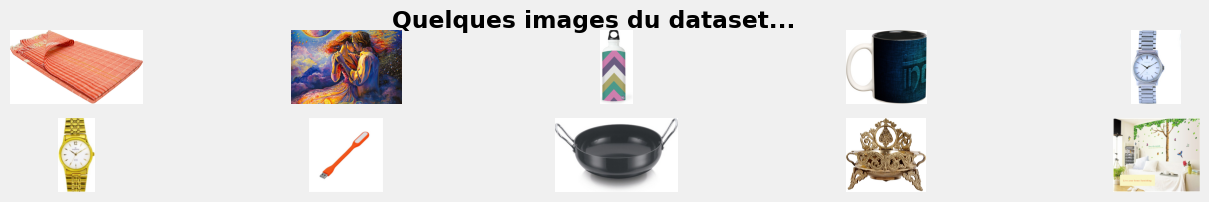

In [41]:
display_thumbnails_from_df(df_pict.image.sample(10), n_rows=2, title='Quelques images du dataset...')

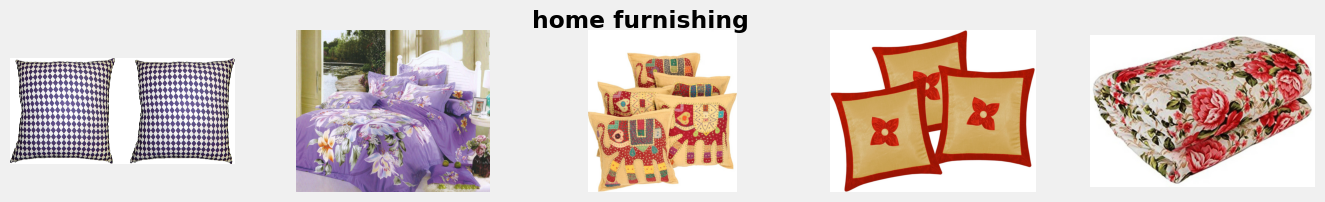

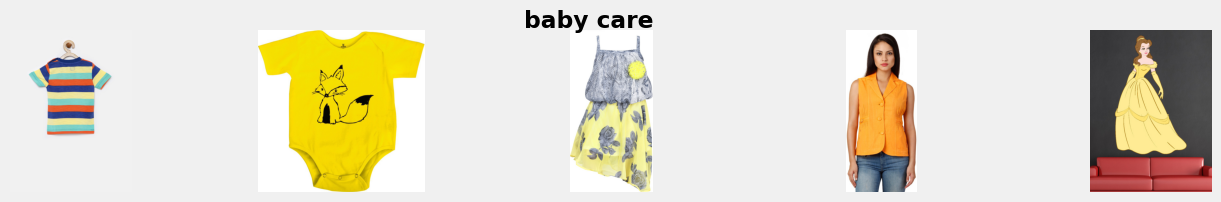

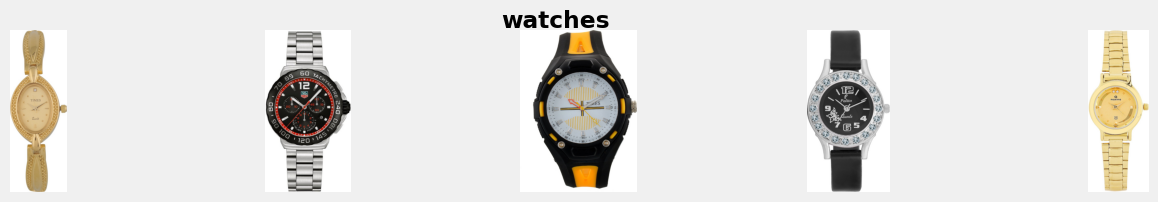

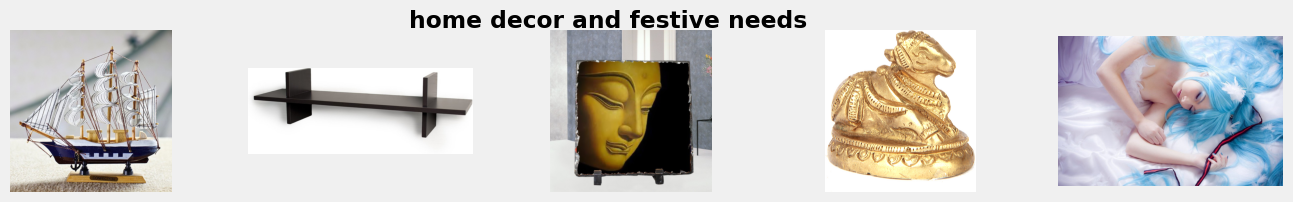

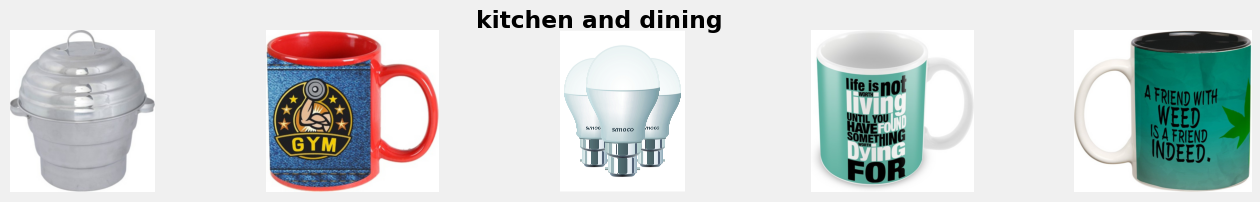

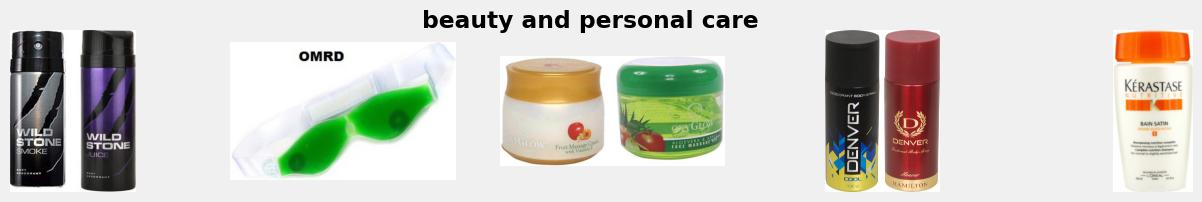

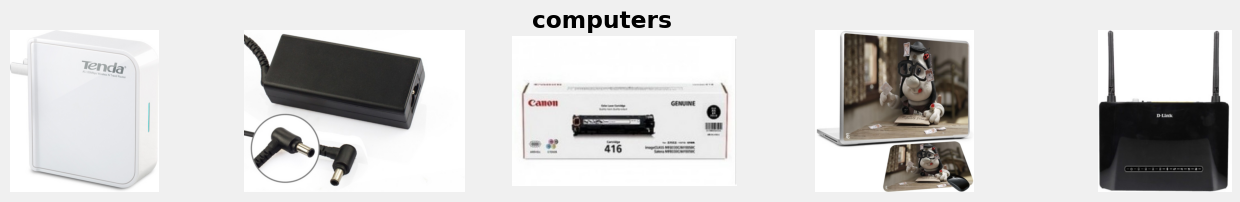

In [42]:
for categ in df_pict.category.unique():
    img_to_display= df_pict[df_pict.category == categ].image.sample(5)
    display_thumbnails_from_df(img_to_display, title=f'{categ}')

# Approche non-supervisée

## Prétraitements

In [43]:
no_preproc = [('convert_color', {'code': cv.COLOR_BGR2GRAY})
            ]

resized = [('convert_color', {'code': cv.COLOR_BGR2GRAY}),
         ('resize', {'interpolation': cv.INTER_AREA, 'dsize':(512, 512)}),
         ]

blur3 = [('convert_color', {'code': cv.COLOR_BGR2GRAY}),
         ('resize', {'interpolation': cv.INTER_AREA, 'dsize':(512, 512)}),
         ('gauss_bl', {'ksize': (3,3), 'sigmaX':1})
        ]


blur3_small = [('convert_color', {'code': cv.COLOR_BGR2GRAY}),
         ('resize', {'interpolation': cv.INTER_AREA, 'dsize':(256, 256)}),
         ('gauss_bl', {'ksize': (3,3), 'sigmaX':1})
        ]

blur3_equalize = [('convert_color', {'code': cv.COLOR_BGR2GRAY}),
                  ('resize', {'interpolation': cv.INTER_AREA, 'dsize':(512, 512)}),
                  ('gauss_bl', {'ksize': (3,3), 'sigmaX':1}),
                  ('equalize', {})
                  ]

blur3_equalize_small = [('convert_color', {'code': cv.COLOR_BGR2GRAY}),
                  ('resize', {'interpolation': cv.INTER_AREA, 'dsize':(256, 256)}),
                  ('gauss_bl', {'ksize': (3,3), 'sigmaX':1}),
                  ('equalize', {})
                  ]

In [11]:
%%time

imgs = df_pict.image

imgs_no_preproc = imgs.apply(lambda img : preproc_image(img, no_preproc))
imgs_resized = imgs.apply(lambda img : preproc_image(img, resized))
imgs_blur3 = imgs.apply(lambda img : preproc_image(img, blur3))
imgs_blur3_small = imgs.apply(lambda img : preproc_image(img, blur3_small))
imgs_blur3_equalize = imgs.apply(lambda img : preproc_image(img, blur3_equalize))
imgs_blur3_equalize_small = imgs.apply(lambda img : preproc_image(img, blur3_equalize_small))

list_preproc = {'no_preproc':imgs_no_preproc, 
                'resized_only': imgs_resized, 
                'blur3': imgs_blur3, 
                'blur3_small': imgs_blur3_small,
                'blur3_equalize': imgs_blur3_equalize, 
                'blur3_equalize_small': imgs_blur3_equalize_small}

Wall time: 16.2 s


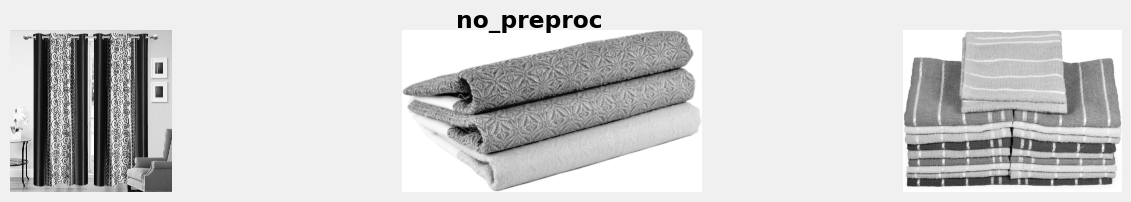

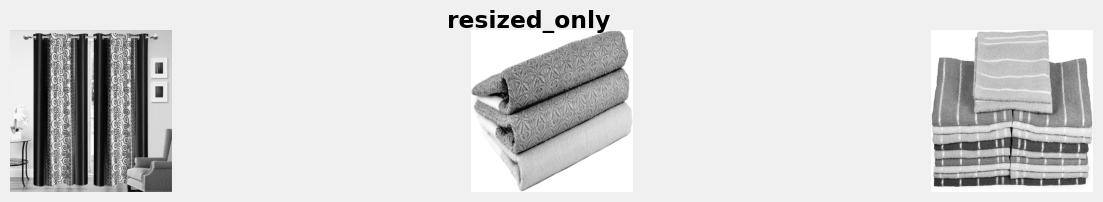

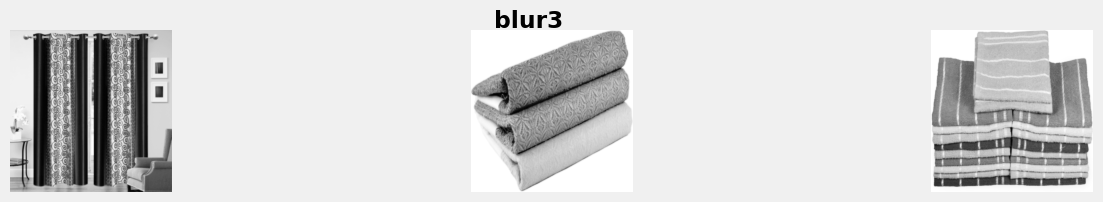

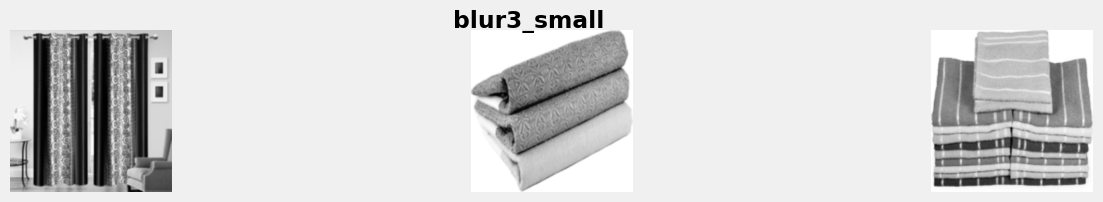

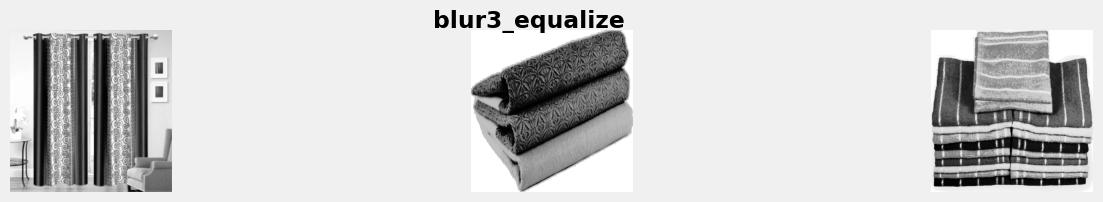

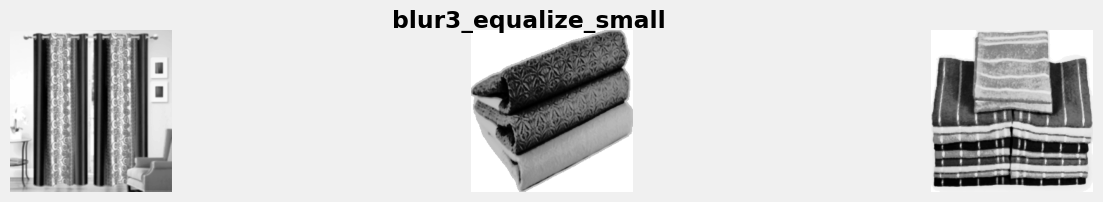

In [12]:
for name, imgs in list_preproc.items():
    img_to_display = imgs.iloc[0:3]
    display_thumbnails_from_df(img_to_display, title=f'{name}')

## Extraction de features avec SIFT

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, accuracy_score
from sklearn import manifold, decomposition

def create_descriptors(imgs, algorithm, orb=False, debug=False):
    keypoints = []
    algo = algorithm
    
    # On détecte les descripteurs et points clés pour chaque image de notre dataset
    for ind, img in enumerate(imgs):
        if ind%100 == 0 and debug: print(ind)
        if orb:
            kp = algo.detect(img,None)
            kp, desc = algo.compute(img, kp)
            desc = [np.zeros((32,))] if desc is None else desc # in case no descriptor
        else:    
            kp, desc = algo.detectAndCompute(img, None)
            desc = [np.zeros((128,))] if desc is None else desc # in case no descriptor
        keypoints.append(desc)
    
    keypoints_by_img = np.asarray(keypoints, dtype='object')
    keypoints_all    = np.concatenate(keypoints_by_img, axis=0)
    
    print("Nombre de descripteurs : ", keypoints_all.shape)
    
    return keypoints_by_img, keypoints_all

def create_visual_words(keypoints_all, model, nb_clusters=None):    
    k = int(round(np.sqrt(len(keypoints_all)),0)) if nb_clusters == None else nb_clusters
    
    print("Nombre de clusters estimés : ", k)
    print("Création de",k, "clusters de descripteurs ...")
    
    # Clustering
    kmeans = model(n_clusters=k, random_state=42)
    kmeans.fit(keypoints_all)
    
    return kmeans

def create_bag_of_visual_words(keypoints_by_img, kmeans, debug=False):
    # Creation of histograms (features)
    def build_histogram(kmeans, des, image_num):
        res = kmeans.predict(des)
        hist = np.zeros(len(kmeans.cluster_centers_))
        nb_des=len(des)
        if nb_des==0 : print("problème histogramme image  : ", image_num)
        for i in res:
            hist[i] += 1.0/nb_des
        return hist


    # Creation of a matrix of histograms
    hist_vectors=[]

    for i, image_desc in enumerate(keypoints_by_img) :
        if i%100 == 0 and debug: print(i)  
        hist = build_histogram(kmeans, np.array(image_desc, dtype=type(kmeans.cluster_centers_[0][0])), i) # On convertit le type du descripteur pour qu'il corresponde au kmeans
        hist_vectors.append(hist) #histogram is the feature vector

    im_features = np.asarray(hist_vectors)
    
    return im_features

def compute_ari_score(im_features, true_labels, n_components=0.95, debug=False):
    kmeans = KMeans(n_clusters=7, random_state=42)

    # Réduction de dimension - PCA
    if debug : print("Dimensions dataset avant réduction PCA : ", im_features.shape)
    pca = decomposition.PCA(n_components=n_components)
    feat_pca= pca.fit_transform(im_features)
    if debug: print(f"Dimensions dataset après réduction PCA (n_components = {n_components}) : ", feat_pca.shape)

    # Centrage et Réduction
    std_scale = StandardScaler().fit(feat_pca)
    X_scaled = std_scale.transform(feat_pca)

    kmeans.fit(X_scaled)

    ari = adjusted_rand_score(true_labels, kmeans.labels_)
    
    return ari


def plot_tsne(im_features, labels, p=30):
    '''
    @param: p --> perplexity tsne
    '''
    print("Dimensions dataset avant réduction PCA : ", im_features.shape)
    pca = decomposition.PCA(n_components=0.99)
    feat_pca= pca.fit_transform(im_features)
    print("Dimensions dataset après réduction PCA (99% variance expliquée) : ", feat_pca.shape)
    
    tsne = manifold.TSNE(n_components=2, perplexity=p, 
                     n_iter=2000, init='random', random_state=6)
    X_tsne = tsne.fit_transform(feat_pca)

    df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
    df_tsne["class"] = labels.values
    
    plt.figure(figsize=(16,8))
    sns.scatterplot(
        x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
        palette=sns.color_palette('tab10', n_colors=len(labels.unique())), s=50, alpha=0.6)

    plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
    plt.legend(prop={'size': 14}) 

    plt.show()

### Sans preprocessing

#### BoVW

In [17]:
keypoints_by_img, keypoints_all = create_descriptors(imgs=imgs_no_preproc, algorithm=cv.xfeatures2d.SIFT_create(50), debug=True)
kmeans = create_visual_words(keypoints_all=keypoints_all, model=KMeans, nb_clusters=None)
im_features = create_bag_of_visual_words(keypoints_by_img=keypoints_by_img, kmeans=kmeans, debug=True)

0
100
200
300
400
500
600
700
800
900
1000
Nombre de descripteurs :  (52670, 128)
Nombre de clusters estimés :  229
Création de 229 clusters de descripteurs ...
0
100
200
300
400
500
600
700
800
900
1000


In [18]:
print('Exemple de descripteur d\'une image')
im_features[0]

Exemple de descripteur d'une image


array([0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.04,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.04, 0.  , 0.08, 0.  , 0.  , 0.02, 0.2 , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ,
       0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [19]:
bovw_df = pd.DataFrame(data=im_features, index=imgs_no_preproc.index).join(df_pict.category)
bovw_df.head()

0    1     2     3     4    5     6  \
name_image                                                                     
55b85ea15a1536d46b7190ad6fff8ce7.jpg  0.00  0.0  0.00  0.00  0.06  0.0  0.00   
7b72c92c2f6c40268628ec5f14c6d590.jpg  0.00  0.0  0.02  0.00  0.00  0.0  0.02   
64d5d4a258243731dc7bbb1eef49ad74.jpg  0.00  0.0  0.00  0.00  0.00  0.0  0.00   
d4684dcdc759dd9cdf41504698d737d8.jpg  0.00  0.0  0.00  0.00  0.04  0.0  0.00   
6325b6870c54cd47be6ebfbffa620ec7.jpg  0.02  0.0  0.00  0.04  0.00  0.0  0.00   

                                         7    8    9    10   11   12   13  \
name_image                                                                  
55b85ea15a1536d46b7190ad6fff8ce7.jpg  0.00  0.0  0.0  0.04  0.0  0.0  0.0   
7b72c92c2f6c40268628ec5f14c6d590.jpg  0.00  0.0  0.0  0.00  0.0  0.0  0.0   
64d5d4a258243731dc7bbb1eef49ad74.jpg  0.04  0.0  0.0  0.00  0.0  0.0  0.0   
d4684dcdc759dd9cdf41504698d737d8.jpg  0.00  0.0  0.0  0.00  0.0  0.0  0.0   
6325b6870c54cd47be6ebfbffa620ec7.jpg  0.00  0.0  0.0  0.02  0.0  0.0  0.0   

                                        14    15    16    17   18    19    20  \
name_image                                                                      
55b85ea15a1536d46b7190ad6fff8ce7.jpg  0.00  0.00  0.00  0.00  0.0  0.00  0.00   
7b72c92c2f6c40268628ec5f14c6d590.jpg  0.02  0.00  0.00  0.00  0.0  0.00  0.14   
64d5d4a258243731dc7bbb1eef49ad74.jpg  0.00  0.04  0.00  0.00  0.0  0.00  0.00   
d4684dcdc759dd9cdf41504698d737d8.jpg  0.00  0.00  0.00  0.02  0.1  0.02  0.04   
6325b6870c54cd47be6ebfbffa620ec7.jpg  0.00  0.00  0.04  0.02  0.0  0.00  0.00   

                                       21   22    23   24  ...  205  206  207  \
name_image                                                 ...                  
55b85ea15a1536d46b7190ad6fff8ce7.jpg  0.0  0.0  0.04  0.0  ...  0.0  0.0  0.0   
7b72c92c2f6c40268628ec5f14c6d590.jpg  0.0  0.0  0.00  0.0  ...  0.0  0.0  0.0   
64d5d4a258243731dc7bbb1eef49ad74.jpg  0.0  0.0  0.00  0.0  ...  0.0  0.0  0.0   
d4684dcdc759dd9cdf41504698d737d8.jpg  0.0  0.0  0.02  0.0  ...  0.0  0.0  0.0   
6325b6870c54cd47be6ebfbffa620ec7.jpg  0.0  0.0  0.00  0.0  ...  0.0  0.0  0.0   

                                      208   209  210   211  212   213  214  \
name_image                                                                   
55b85ea15a1536d46b7190ad6fff8ce7.jpg  0.0  0.00  0.0  0.00  0.0  0.02  0.0   
7b72c92c2f6c40268628ec5f14c6d590.jpg  0.0  0.00  0.0  0.02  0.0  0.02  0.0   
64d5d4a258243731dc7bbb1eef49ad74.jpg  0.0  0.00  0.0  0.00  0.0  0.00  0.0   
d4684dcdc759dd9cdf41504698d737d8.jpg  0.0  0.02  0.0  0.00  0.0  0.00  0.0   
6325b6870c54cd47be6ebfbffa620ec7.jpg  0.0  0.02  0.0  0.00  0.0  0.00  0.0   

                                       215  216  217   218  219  220   221  \
name_image                                                                   
55b85ea15a1536d46b7190ad6fff8ce7.jpg  0.00  0.0  0.0  0.00  0.0  0.0  0.00   
7b72c92c2f6c40268628ec5f14c6d590.jpg  0.00  0.0  0.0  0.04  0.0  0.0  0.06   
64d5d4a258243731dc7bbb1eef49ad74.jpg  0.00  0.0  0.0  0.00  0.0  0.0  0.00   
d4684dcdc759dd9cdf41504698d737d8.jpg  0.00  0.0  0.0  0.00  0.0  0.0  0.00   
6325b6870c54cd47be6ebfbffa620ec7.jpg  0.04  0.0  0.0  0.00  0.0  0.0  0.00   

                                       222   223   224   225   226   227  228  \
name_image                                                                      
55b85ea15a1536d46b7190ad6fff8ce7.jpg  0.02  0.00  0.00  0.18  0.04  0.00  0.0   
7b72c92c2f6c40268628ec5f14c6d590.jpg  0.00  0.00  0.06  0.04  0.00  0.02  0.0   
64d5d4a258243731dc7bbb1eef49ad74.jpg  0.00  0.02  0.00  0.00  0.00  0.00  0.0   
d4684dcdc759dd9cdf41504698d737d8.jpg  0.00  0.00  0.02  0.00  0.00  0.00  0.0   
6325b6870c54cd47be6ebfbffa620ec7.jpg  0.02  0.00  0.00  0.00  0.00  0.00  0.0   

                                             category  
name_image                                             
55b85ea15a1536d46b7190ad6fff8c

In [15]:
df_pict.head(1)

category  \
name_image                                              
55b85ea15a1536d46b7190ad6fff8ce7.jpg  home furnishing   

                                                                                                                                    image  
name_image                                                                                                                                 
55b85ea15a1536d46b7190ad6fff8ce7.jpg  [[[192, 184, 173], [192, 184, 173], [193, 185, 174], [193, 185, 174], [193, 185, 174], [192, 184...

#### Analyse visuelle de la séparation

Dimensions dataset avant réduction PCA :  (1050, 229)
Dimensions dataset après réduction PCA (99% variance expliquée) :  (1050, 203)


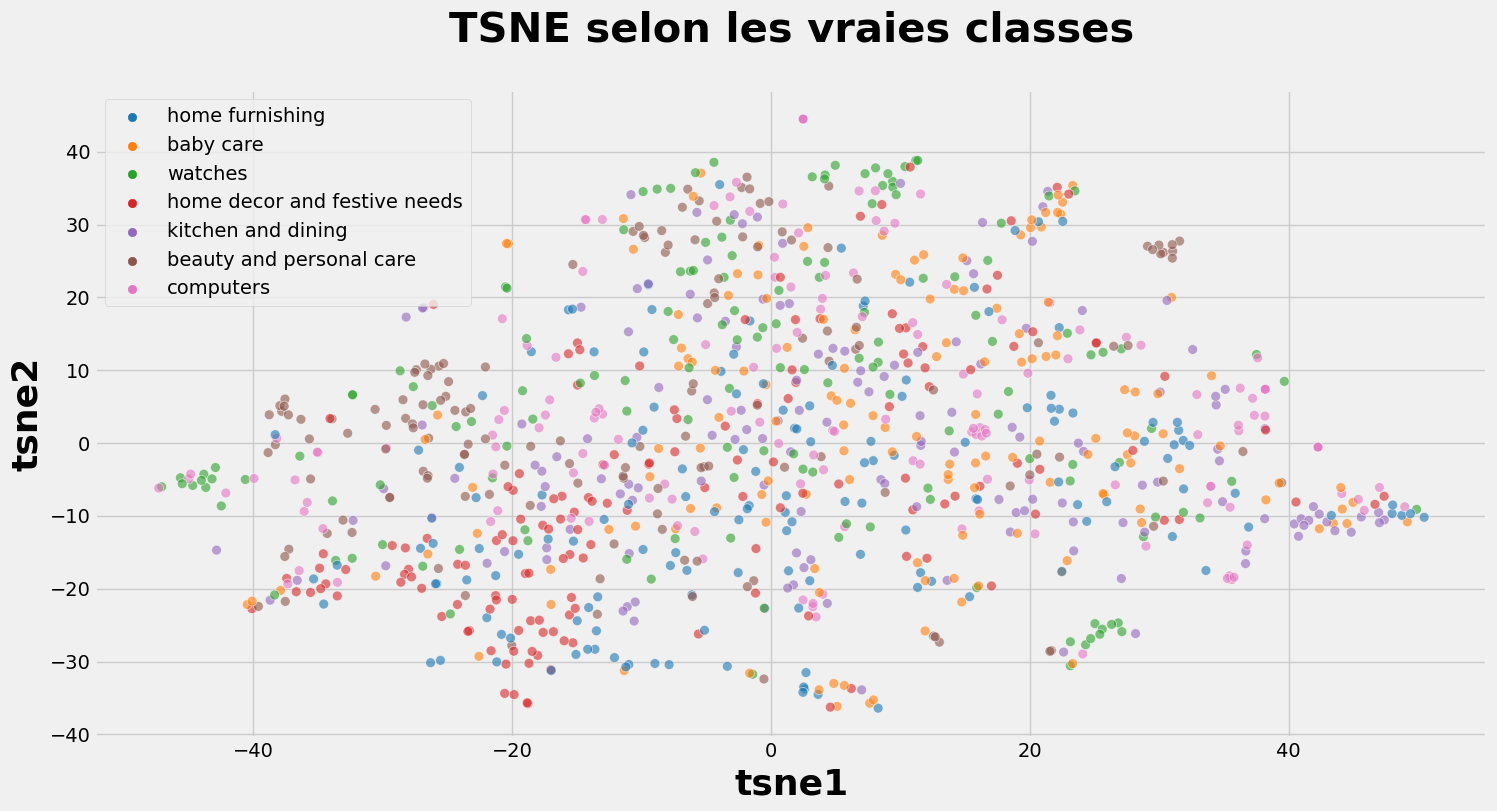

In [71]:
plot_tsne(im_features, bovw_df.category)

Certaines 'watches' semblent regroupées mais globalement l'ensemble à du bruit.

#### Analyse quantitative de la séparation

In [51]:
%%time
kmeans = KMeans(n_clusters=7, random_state=42)

# Réduction de dimension - PCA
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.95)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA (95% variance expliquée) : ", feat_pca.shape)

# Centrage et Réduction
std_scale = StandardScaler().fit(feat_pca)
X_scaled = std_scale.transform(feat_pca)

kmeans.fit(X_scaled)

adjusted_rand_score(bovw_df.category.values, kmeans.labels_)

Dimensions dataset avant réduction PCA :  (1050, 229)
Dimensions dataset après réduction PCA (95% variance expliquée) :  (1050, 152)
Wall time: 122 ms


0.001470031523308225

### Avec preprocessing

In [137]:
tmp = list_preproc.copy()
tmp.pop('no_preproc')

name_image
55b85ea15a1536d46b7190ad6fff8ce7.jpg    [[182, 182, 183, 183, 183, 182, 181, 181, 182, 182, 182, 182, 182, 182, 182, 182, 183, 183, 184,...
7b72c92c2f6c40268628ec5f14c6d590.jpg    [[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,...
64d5d4a258243731dc7bbb1eef49ad74.jpg    [[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,...
d4684dcdc759dd9cdf41504698d737d8.jpg    [[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,...
6325b6870c54cd47be6ebfbffa620ec7.jpg    [[97, 78, 64, 59, 67, 78, 81, 86, 76, 72, 54, 37, 34, 39, 54, 75, 102, 122, 144, 156, 160, 161, ...
                                                                                       ...                                                 
958f54f4c46b53c8a0a9b8167d9140bc.jpg    [[252, 254, 254, 254, 253, 254, 254, 253, 252, 252, 254, 255, 255, 254, 252, 253, 255, 255, 255,...
fd6cbcc22

In [138]:
%%time 

algorithm=cv.xfeatures2d.SIFT_create(50)
categ = df_pict.category

for name, imgs in tmp.items():
    print(f'---------- {name} ----------')
    print('--- Calcul des keypoints ---')
    keypoints_by_img, keypoints_all = create_descriptors(imgs=imgs, algorithm=algorithm)
    print('--- Création des visual words ---')
    kmeans = create_visual_words(keypoints_all=keypoints_all, model=KMeans, nb_clusters=None)
    print('--- Création des features ---')
    im_features = create_bag_of_visual_words(keypoints_by_img=keypoints_by_img, kmeans=kmeans)
    
    bovw_df = pd.DataFrame(data=im_features, index=imgs.index).join(categ)
    
    print(f'Score ARI ({name}): {compute_ari_score(im_features, bovw_df.category.values)}')
    print()

---------- resized_only ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (52346, 128)
--- Création des visual words ---
Nombre de clusters estimés :  229
Création de 229 clusters de descripteurs ...
--- Création des features ---
Dimensions dataset avant réduction PCA :  (1050, 229)
Dimensions dataset après réduction PCA (95% variance expliquée) :  (1050, 161)
Score ARI (resized_only): 0.006957276955499274

---------- blur3 ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (52171, 128)
--- Création des visual words ---
Nombre de clusters estimés :  228
Création de 228 clusters de descripteurs ...
--- Création des features ---
Dimensions dataset avant réduction PCA :  (1050, 228)
Dimensions dataset après réduction PCA (95% variance expliquée) :  (1050, 164)
Score ARI (blur3): 0.006058921807023648

---------- blur3_small ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (51306, 128)
--- Création des visual words ---
Nombre de clusters estim

## Extraction de features avec ORB

In [139]:
%%time 

algorithm=cv.ORB_create(50)
categ = df_pict.category

for name, imgs in list_preproc.items():
    print(f'---------- {name} ----------')
    print('--- Calcul des keypoints ---')
    keypoints_by_img, keypoints_all = create_descriptors(imgs=imgs, algorithm=algorithm, orb=True)
    print('--- Création des visual words ---')
    kmeans = create_visual_words(keypoints_all=keypoints_all, model=KMeans, nb_clusters=None)
    print('--- Création des features ---')
    im_features = create_bag_of_visual_words(keypoints_by_img=keypoints_by_img, kmeans=kmeans)
    
    bovw_df = pd.DataFrame(data=im_features, index=imgs.index).join(categ)
    
    print(f'Score ARI ({name}): {compute_ari_score(im_features, bovw_df.category.values)}')
    print()

---------- no_preproc ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (52063, 32)
--- Création des visual words ---
Nombre de clusters estimés :  228
Création de 228 clusters de descripteurs ...
--- Création des features ---
Dimensions dataset avant réduction PCA :  (1050, 228)
Dimensions dataset après réduction PCA (95% variance expliquée) :  (1050, 185)
Score ARI (no_preproc): -0.00015853608856720018

---------- resized_only ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (51939, 32)
--- Création des visual words ---
Nombre de clusters estimés :  228
Création de 228 clusters de descripteurs ...
--- Création des features ---
Dimensions dataset avant réduction PCA :  (1050, 228)
Dimensions dataset après réduction PCA (95% variance expliquée) :  (1050, 184)
Score ARI (resized_only): 0.0011166822487583764

---------- blur3 ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (51686, 32)
--- Création des visual words ---
Nombre de clusters 

## Extraction de features avec du transfer learning

In [12]:
from tensorflow.keras.applications import EfficientNetB0

In [13]:
model = EfficientNetB0(include_top=False, weights='imagenet', pooling='avg')

### Prétraitements

In [51]:
resized_256 =  [('resize', {'interpolation': cv.INTER_AREA, 'dsize':(256, 256)}),
              ]

resized_512 =  [('resize', {'interpolation': cv.INTER_AREA, 'dsize':(512, 512)}),
              ]

blur3_rgb =  [('resize', {'interpolation': cv.INTER_AREA, 'dsize':(256, 256)}),
               ('gauss_bl', {'ksize': (3,3), 'sigmaX':1})
              ]


imgs = df_pict.image

imgs_resized_256 = imgs.apply(lambda img : preproc_image(img, resized_256))
imgs_resized_512 = imgs.apply(lambda img : preproc_image(img, resized_512))
imgs_blur3_rgb = imgs.apply(lambda img : preproc_image(img, blur3_rgb))

### 256x256

In [17]:
%%time
features_list = []

for img in imgs_resized_256:
    im_feat = model(img).numpy()[0]
    features_list.append(im_feat)

Wall time: 1min 41s


Dimensions dataset avant réduction PCA :  (1050, 1280)
Dimensions dataset après réduction PCA (99% variance expliquée) :  (1050, 671)


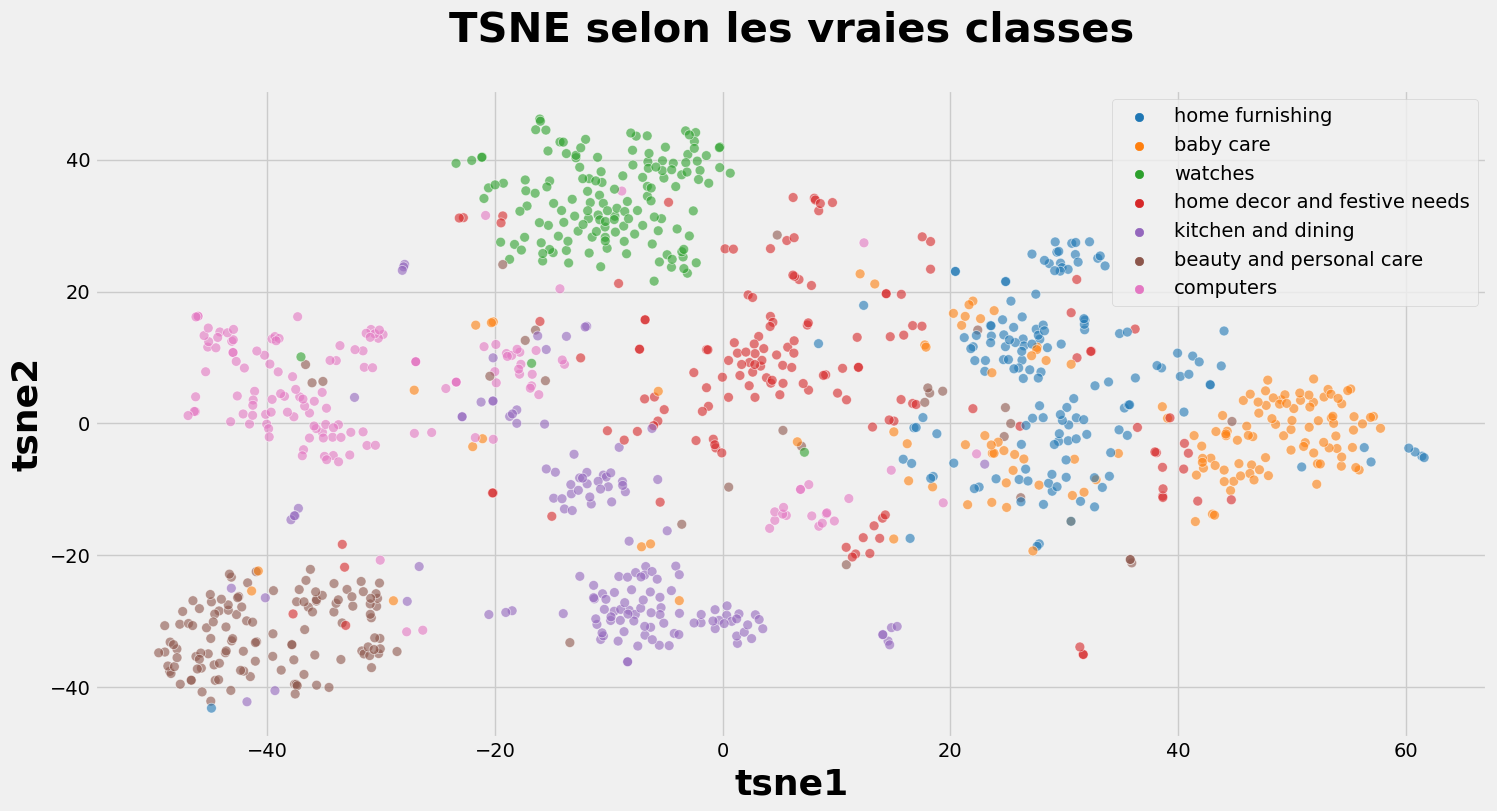

In [27]:
plot_tsne(np.array(features_list), df_pict.category)

In [49]:
for th in np.linspace(0.1,0.9,9):
    print(f'{th}: {compute_ari_score(np.array(features_list), df_pict.category, th)}')

0.1: 0.3620587820335951
0.2: 0.4785250274212298
0.30000000000000004: 0.5450344668077571
0.4: 0.5755691525796637
0.5: 0.22772652512287947
0.6: 0.1806245755958061
0.7000000000000001: 0.0946071817518619
0.8: 0.1560852520525824
0.9: 0.019914251067019818


### 512x512

Dimensions dataset avant réduction PCA :  (1050, 1280)
Dimensions dataset après réduction PCA (99% variance expliquée) :  (1050, 625)


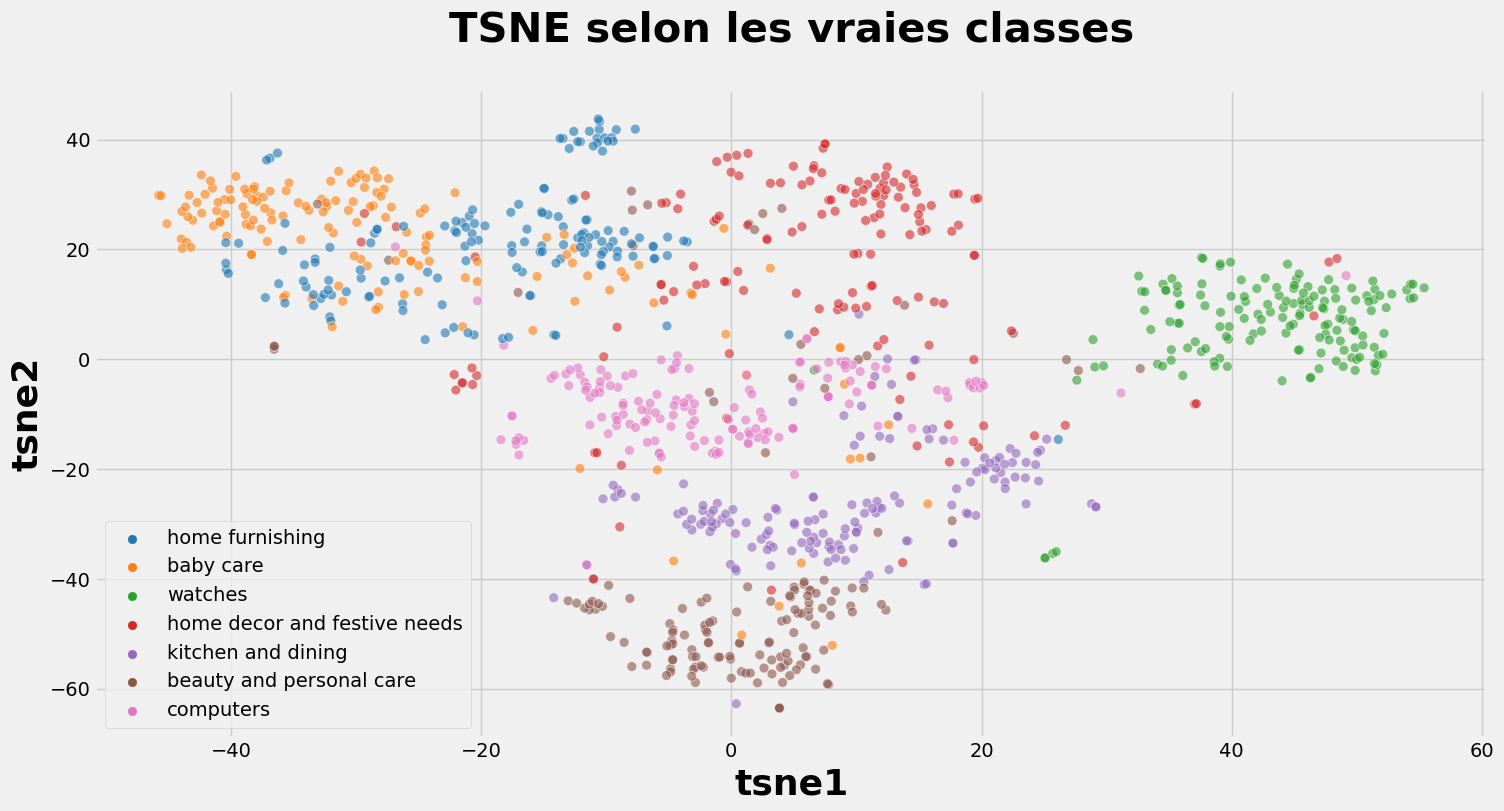

0.1: 0.3713816698073385
0.2: 0.4546100722112464
0.30000000000000004: 0.5235793315049522
0.4: 0.5460704524690457
0.5: 0.5005873821674159
0.6: 0.29186704530489305
0.7000000000000001: 0.19016523027659468
0.8: 0.1590035100967567
0.9: 0.038646903070235106
Wall time: 4min 33s


In [50]:
%%time
features_list = []

for img in imgs_resized_512:
    im_feat = model(img).numpy()[0]
    features_list.append(im_feat)

plot_tsne(np.array(features_list), df_pict.category)

for th in np.linspace(0.1,0.9,9):
    print(f'{th}: {compute_ari_score(np.array(features_list), df_pict.category, th)}')

### Avec filtre gaussien

Dimensions dataset avant réduction PCA :  (1050, 1280)
Dimensions dataset après réduction PCA (99% variance expliquée) :  (1050, 662)


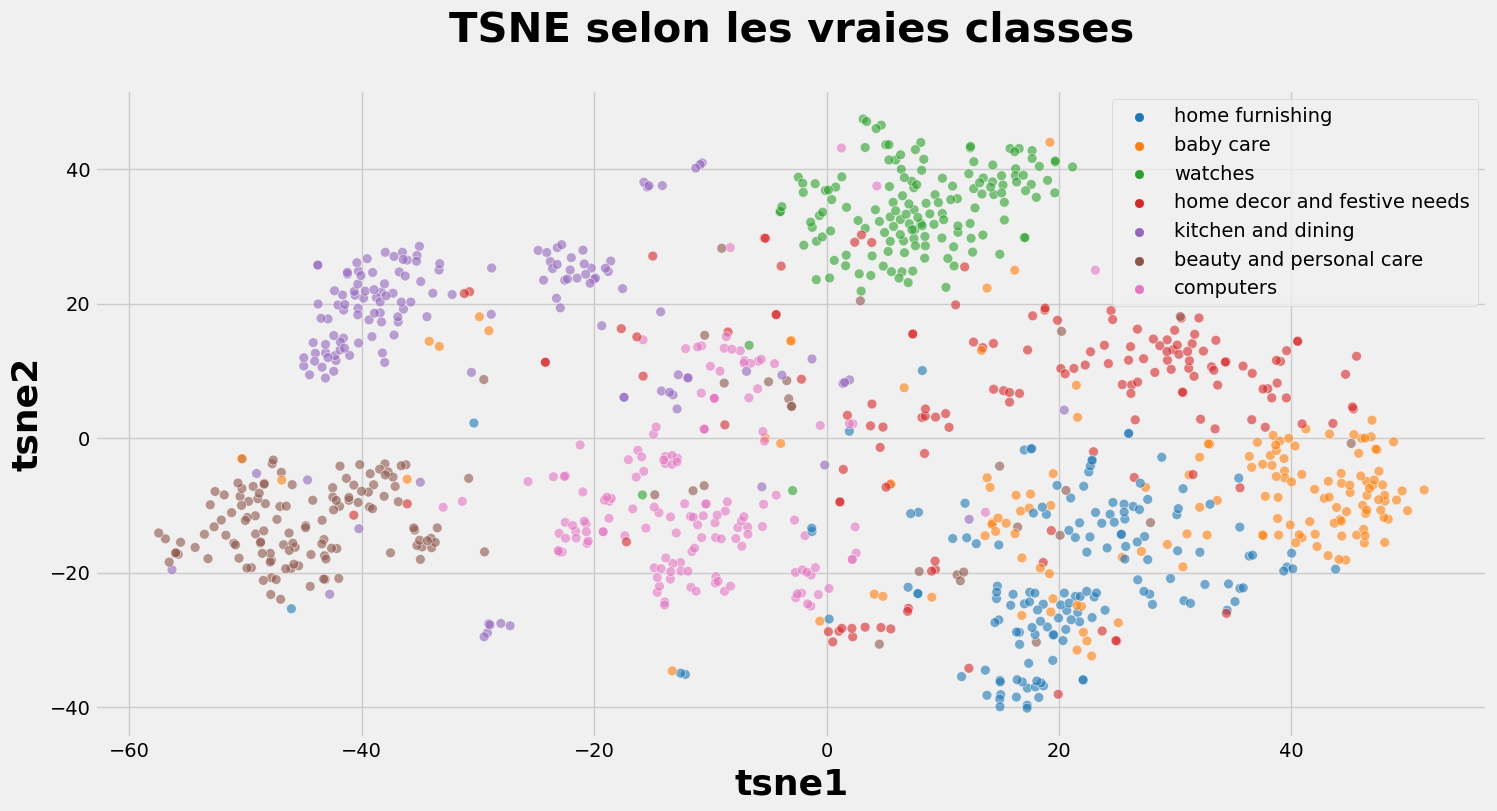

0.1: 0.30250141972162664
0.2: 0.47267849171713994
0.30000000000000004: 0.4733440640625566
0.4: 0.4007465061194825
0.5: 0.40461298637519344
0.6: 0.30834211133766176
0.7000000000000001: 0.16130343649773196
0.8: 0.08744363261499853
0.9: 0.02812956207618839
Wall time: 1min 54s


In [52]:
%%time
features_list = []

for img in imgs_blur3_rgb:
    im_feat = model(img).numpy()[0]
    features_list.append(im_feat)

plot_tsne(np.array(features_list), df_pict.category)

for th in np.linspace(0.1,0.9,9):
    print(f'{th}: {compute_ari_score(np.array(features_list), df_pict.category, th)}')

# Approche supervisée

## Random Forest

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### SIFT

In [16]:
df_pict.drop()

category  \
name_image                                              
55b85ea15a1536d46b7190ad6fff8ce7.jpg  home furnishing   
7b72c92c2f6c40268628ec5f14c6d590.jpg        baby care   
64d5d4a258243731dc7bbb1eef49ad74.jpg        baby care   
d4684dcdc759dd9cdf41504698d737d8.jpg  home furnishing   
6325b6870c54cd47be6ebfbffa620ec7.jpg  home furnishing   

                                                                                                                                    image  
name_image                                                                                                                                 
55b85ea15a1536d46b7190ad6fff8ce7.jpg  [[[192, 184, 173], [192, 184, 173], [193, 185, 174], [193, 185, 174], [193, 185, 174], [192, 184...  
7b72c92c2f6c40268628ec5f14c6d590.jpg  [[[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255...  
64d5d4a258243731dc7bbb1eef49ad74.jpg  [[[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255...  
d4684dcdc759dd9cdf41504698d737d8.jpg  [[[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255...  
6325b6870c54cd47be6ebfbffa620ec7.jpg  [[[99, 99, 91], [80, 80, 72], [67, 67, 57], [62, 62, 52], [72, 69, 60], [83, 80, 73], [85, 82, 7...

In [37]:
%%time 

algorithm=cv.xfeatures2d.SIFT_create(50)
categ = df_pict.category
orb=False
debug = True

n_components=0.6
params = {'max_depth': range(5, 20, 3)}




for name, imgs in list_preproc.items():
    print(f'---------- {name} ----------')
    print('--- Calcul des keypoints ---')
    keypoints_by_img, keypoints_all = create_descriptors(imgs=imgs, algorithm=algorithm, orb=orb)
    print('--- Création des visual words ---')
    kmeans = create_visual_words(keypoints_all=keypoints_all, model=KMeans, nb_clusters=None)
    print('--- Création des features ---')
    im_features = create_bag_of_visual_words(keypoints_by_img=keypoints_by_img, kmeans=kmeans)
    
    bovw_df = pd.DataFrame(data=im_features, index=imgs.index).join(categ)
    
    train, test = train_test_split(bovw_df, test_size=0.2, stratify=bovw_df.category, random_state=42)
    
    X_train = train.drop('category', axis=1); y_train = train.category
    X_test = test.drop('category', axis=1); y_test = test.category
    
    
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    # Réduction de dimension - PCA
    if debug : print("Dimensions dataset avant réduction PCA : ", im_features.shape)
    pca = decomposition.PCA(n_components=n_components)
    pca.fit_transform(X_train_std)
    X_train_pca = pca.transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)    
    if debug: print(f"Dimensions dataset après réduction PCA (n_components = {n_components}) : ", X_train_pca.shape)
    
    grid_search = GridSearchCV(RandomForestClassifier(n_estimators=200, random_state=0), params)
    grid_search.fit(X_train_pca, y_train)
    
    model = grid_search.best_estimator_
    
    print(f'Score ARI: {adjusted_rand_score(y_test, model.predict(X_test_pca))}')
    print(f'Accuracy: {accuracy_score(y_test, model.predict(X_test_pca))}')
    
    


---------- no_preproc ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (52670, 128)
--- Création des visual words ---
Nombre de clusters estimés :  229
Création de 229 clusters de descripteurs ...
--- Création des features ---
Dimensions dataset avant réduction PCA :  (1050, 229)
Dimensions dataset après réduction PCA (n_components = 0.6) :  (840, 60)
Score ARI: 0.09906131734489944
Accuracy: 0.3761904761904762
---------- resized_only ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (52346, 128)
--- Création des visual words ---
Nombre de clusters estimés :  229
Création de 229 clusters de descripteurs ...
--- Création des features ---
Dimensions dataset avant réduction PCA :  (1050, 229)
Dimensions dataset après réduction PCA (n_components = 0.6) :  (840, 64)
Score ARI: 0.07708571563620895
Accuracy: 0.37142857142857144
---------- blur3 ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (52171, 128)
--- Création des visual words ---
Nombr

### ORB

In [50]:
%%time 

algorithm=cv.ORB_create(50)
categ = df_pict.category
orb=True
debug = True

n_components=0.6
params = {'max_depth': range(5, 20, 3)}



for name, imgs in list_preproc.items():
    print(f'---------- {name} ----------')
    print('--- Calcul des keypoints ---')
    keypoints_by_img, keypoints_all = create_descriptors(imgs=imgs, algorithm=algorithm, orb=orb)
    print('--- Création des visual words ---')
    kmeans = create_visual_words(keypoints_all=keypoints_all, model=KMeans, nb_clusters=None)
    print('--- Création des features ---')
    im_features = create_bag_of_visual_words(keypoints_by_img=keypoints_by_img, kmeans=kmeans)
    
    bovw_df = pd.DataFrame(data=im_features, index=imgs.index).join(categ)
    
    train, test = train_test_split(bovw_df, test_size=0.2, stratify=bovw_df.category, random_state=42)
    
    X_train = train.drop('category', axis=1); y_train = train.category
    X_test = test.drop('category', axis=1); y_test = test.category
    
    
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    # Réduction de dimension - PCA
    if debug : print("Dimensions dataset avant réduction PCA : ", im_features.shape)
    pca = decomposition.PCA(n_components=n_components)
    pca.fit_transform(X_train_std)
    X_train_pca = pca.transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)    
    if debug: print(f"Dimensions dataset après réduction PCA (n_components = {n_components}) : ", X_train_pca.shape)
    
    grid_search = GridSearchCV(RandomForestClassifier(n_estimators=200, random_state=0), params)
    grid_search.fit(X_train_pca, y_train)
    
    model = grid_search.best_estimator_
    
    print(f'Score ARI: {adjusted_rand_score(y_test, model.predict(X_test_pca))}')
    print(f'Accuracy: {accuracy_score(y_test, model.predict(X_test_pca))}')
    
    


---------- no_preproc ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (52063, 32)
--- Création des visual words ---
Nombre de clusters estimés :  228
Création de 228 clusters de descripteurs ...
--- Création des features ---
Dimensions dataset avant réduction PCA :  (1050, 228)
Dimensions dataset après réduction PCA (n_components = 0.6) :  (840, 77)
Score ARI: 0.030759721554386058
Accuracy: 0.3
---------- resized_only ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (51939, 32)
--- Création des visual words ---
Nombre de clusters estimés :  228
Création de 228 clusters de descripteurs ...
--- Création des features ---
Dimensions dataset avant réduction PCA :  (1050, 228)
Dimensions dataset après réduction PCA (n_components = 0.6) :  (840, 76)
Score ARI: 0.037140856158253556
Accuracy: 0.32857142857142857
---------- blur3 ----------
--- Calcul des keypoints ---
Nombre de descripteurs :  (51686, 32)
--- Création des visual words ---
Nombre de clusters es

### Transfer Learning

In [38]:
from tensorflow.keras.applications import EfficientNetB0



In [39]:
resized_256 =  [('resize', {'interpolation': cv.INTER_AREA, 'dsize':(256, 256)}),
              ]

resized_512 =  [('resize', {'interpolation': cv.INTER_AREA, 'dsize':(512, 512)}),
              ]

blur3_rgb =  [('resize', {'interpolation': cv.INTER_AREA, 'dsize':(256, 256)}),
               ('gauss_bl', {'ksize': (3,3), 'sigmaX':1})
              ]


imgs = df_pict.image

imgs_resized_256 = imgs.apply(lambda img : preproc_image(img, resized_256))
imgs_resized_512 = imgs.apply(lambda img : preproc_image(img, resized_512))
imgs_blur3_rgb = imgs.apply(lambda img : preproc_image(img, blur3_rgb))

#### 256x256

In [40]:
%%time
features_list = []
model = EfficientNetB0(include_top=False, weights='imagenet', pooling='avg')

for img in imgs_resized_256:
    im_feat = model(img).numpy()[0]
    features_list.append(im_feat)

Wall time: 1min 47s


In [49]:
categ = df_pict.category
orb=True
debug = True
n_components=0.6
params = {'max_depth': range(5, 20, 3)}

im_features = np.array(features_list)

bovw_df = pd.DataFrame(data=im_features, index=imgs.index).join(categ)

train, test = train_test_split(bovw_df, test_size=0.2, stratify=bovw_df.category, random_state=42)

X_train = train.drop('category', axis=1); y_train = train.category
X_test = test.drop('category', axis=1); y_test = test.category


scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Réduction de dimension - PCA
if debug : print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=n_components)
pca.fit_transform(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)    
if debug: print(f"Dimensions dataset après réduction PCA (n_components = {n_components}) : ", X_train_pca.shape)

grid_search = GridSearchCV(RandomForestClassifier(n_estimators=200, random_state=0), params)
grid_search.fit(X_train_pca, y_train)

model = grid_search.best_estimator_

print(f'Score ARI: {adjusted_rand_score(y_test, model.predict(X_test_pca))}')
print(f'Accuracy: {accuracy_score(y_test, model.predict(X_test_pca))}')

Dimensions dataset avant réduction PCA :  (1050, 1280)
Dimensions dataset après réduction PCA (n_components = 0.6) :  (840, 62)
Score ARI: 0.6548463717879064
Accuracy: 0.8333333333333334


#### 512x512

In [55]:
%%time
features_list = []
model = EfficientNetB0(include_top=False, weights='imagenet', pooling='avg')

for img in imgs_resized_512:
    im_feat = model(img).numpy()[0]
    features_list.append(im_feat)

categ = df_pict.category
orb=True
debug = True
n_components=0.6
params = {'max_depth': range(5, 20, 3)}

im_features = np.array(features_list)

bovw_df = pd.DataFrame(data=im_features, index=imgs.index).join(categ)

train, test = train_test_split(bovw_df, test_size=0.2, stratify=bovw_df.category, random_state=42)

X_train = train.drop('category', axis=1); y_train = train.category
X_test = test.drop('category', axis=1); y_test = test.category


scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Réduction de dimension - PCA
if debug : print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=n_components)
pca.fit_transform(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)    
if debug: print(f"Dimensions dataset après réduction PCA (n_components = {n_components}) : ", X_train_pca.shape)

grid_search = GridSearchCV(RandomForestClassifier(n_estimators=200, random_state=0), params)
grid_search.fit(X_train_pca, y_train)

model = grid_search.best_estimator_

print(f'Score ARI: {adjusted_rand_score(y_test, model.predict(X_test_pca))}')
print(f'Accuracy: {accuracy_score(y_test, model.predict(X_test_pca))}')

Dimensions dataset avant réduction PCA :  (1050, 1280)
Dimensions dataset après réduction PCA (n_components = 0.6) :  (840, 43)
Score ARI: 0.5961948291922821
Accuracy: 0.8047619047619048
Wall time: 5min 38s


## Approche Deep Learning

### Création des folders

In [48]:
import shutil, os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.3.0'

In [4]:
# Test if GPU available
tf.test.gpu_device_name()

''

In [71]:
source_path = 'Images'
dest_path = 'img_dl'

os.chdir('data/')
for categ in df_pict.category.unique():
    print(f'----- {categ} -----')
    name_folder_categ = categ.replace(' ', '_')
    
    os.mkdir(dest_path + '/train/' + f'{name_folder_categ}/')
    os.mkdir(dest_path + '/valid/' + f'{name_folder_categ}/')
    os.mkdir(dest_path + '/test/' + f'{name_folder_categ}/')
    
    for ind, img in enumerate(df_pict[df_pict.category == categ].index):
        if ind >= 130:
            shutil.copy(source_path + '/' + img, dest_path + '/test/' + f'{name_folder_categ}/')
        elif ind >= 110:
            shutil.copy(source_path + '/' + img, dest_path + '/valid/' + f'{name_folder_categ}/')
        else:
            shutil.copy(source_path + '/' + img, dest_path + '/train/' + f'{name_folder_categ}/')
    
os.chdir('../')

----- home furnishing -----
----- baby care -----
----- watches -----
----- home decor and festive needs -----
----- kitchen and dining -----
----- beauty and personal care -----
----- computers -----


In [89]:
classes = list(map(lambda x : x.replace(' ', '_'), df_pict.category.unique().tolist())) 


# Create a dataset.
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  'data/img_dl/train', batch_size=10, image_size=(224, 224), label_mode='categorical')
valid_set = tf.keras.preprocessing.image_dataset_from_directory(
  'data/img_dl/valid', batch_size=10, image_size=(224, 224), label_mode='categorical')
test_set = tf.keras.preprocessing.image_dataset_from_directory(
  'data/img_dl/test', batch_size=10, image_size=(224, 224), label_mode='categorical')

Found 770 files belonging to 7 classes.
Found 140 files belonging to 7 classes.
Found 140 files belonging to 7 classes.


## EfficientNet

In [14]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers

In [113]:
def build_model(num_classes, img_size=224):
    inputs = layers.Input(shape=(img_size, img_size, 3))
#     x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model


In [123]:
model = build_model(num_classes=7)

In [97]:
# model.summary()
print("weights:", len(model.weights))
print("trainable_weights:", len(model.trainable_weights))
print("non_trainable_weights:", len(model.non_trainable_weights))

weights: 318
trainable_weights: 4
non_trainable_weights: 314


In [119]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='data/models_saved/efficientnet_epoch{epoch}',
        save_freq='epoch')
]

hist = model.fit(x=train_set,
    steps_per_epoch=len(train_set),
    validation_data=valid_set,
    validation_steps=len(valid_set),
    epochs=7,
    verbose=2,
    callbacks=callbacks
)

Epoch 1/7
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: data/models_saved\efficientnet_epoch1\assets
77/77 - 69s - loss: 0.7232 - accuracy: 0.8766 - val_loss: 1.4646 - val_accuracy: 0.7500
Epoch 2/7
INFO:tensorflow:Assets written to: data/models_saved\efficientnet_epoch2\assets
77/77 - 70s - loss: 0.7415 - accuracy: 0.8805 - val_loss: 2.1722 - val_accuracy: 0.6929
Epoch 3/7
INFO:tensorflow:Assets written to: data/models_saved\efficientnet_epoch3\assets
77/77 - 69s - loss: 0.5374 - accuracy: 0.9143 - val_loss: 2.3653 - val_accuracy: 0.8071
Epoch 4/7
INFO:tensorflow:Assets written to: data/models_saved\efficientnet_epoch4\assets
77/77 - 72s - loss: 0.5160 - accuracy: 0.9195 - val_loss: 2.8003 - val_accuracy: 0.8143
Epoch 5/7
INFO:tensorflow:Assets written to: data/mode

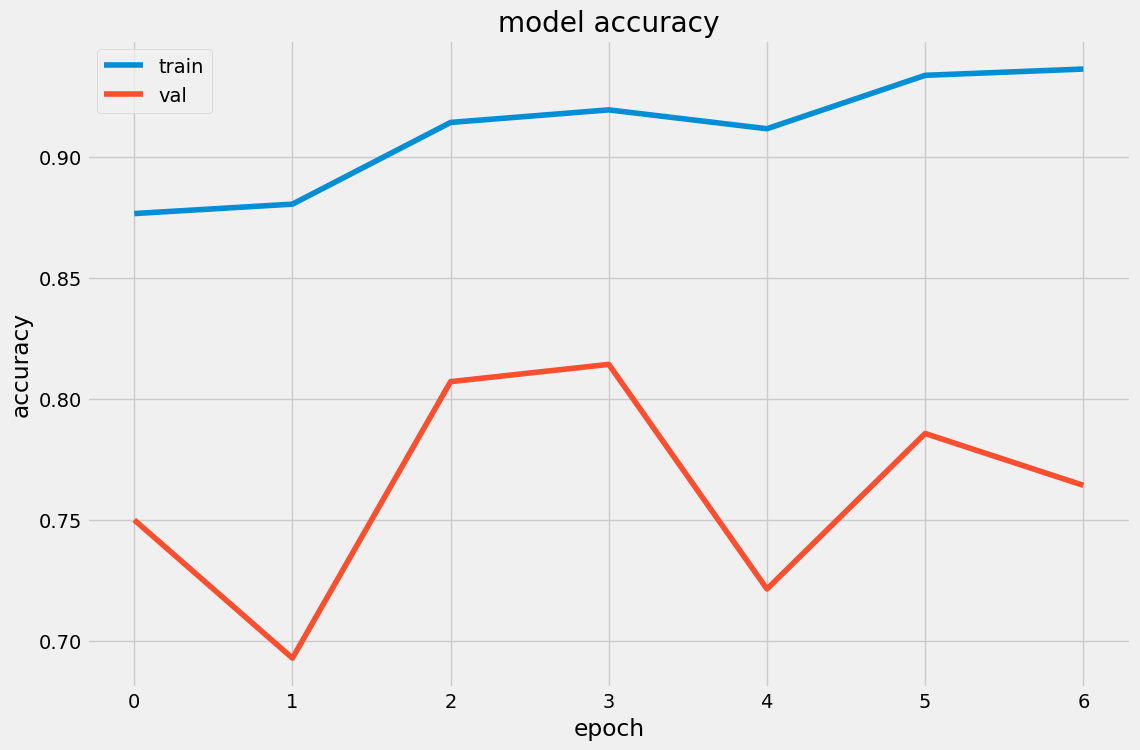

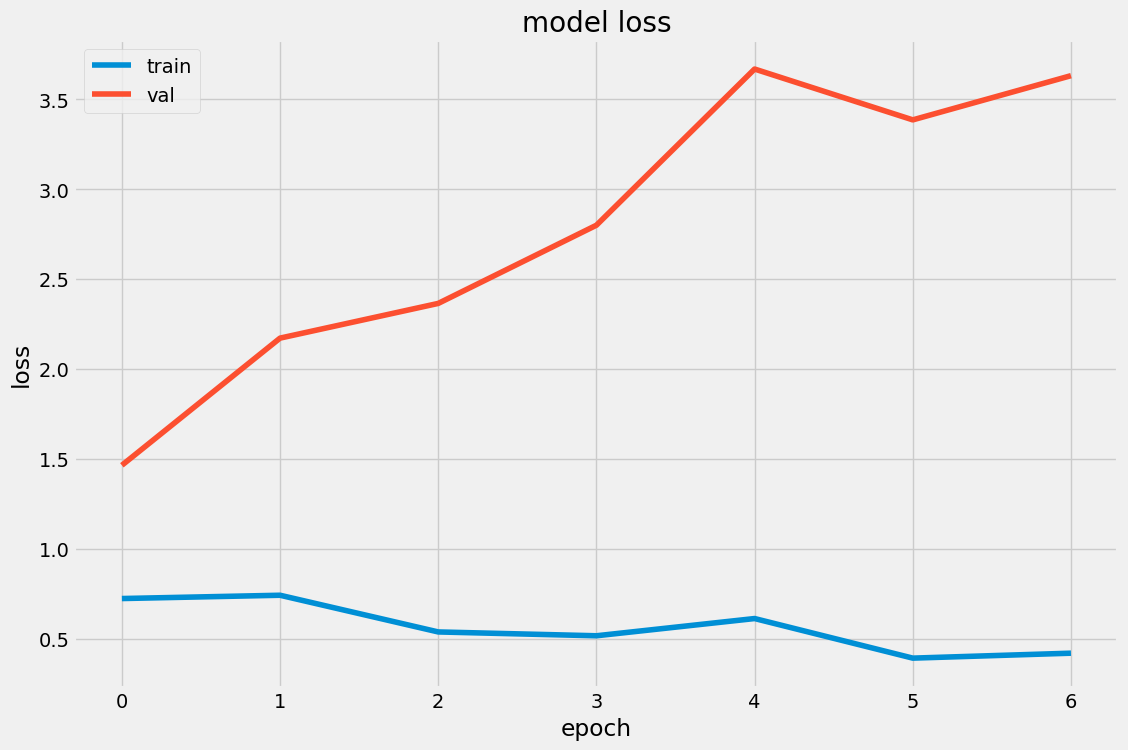

In [120]:
history=hist

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Overfitting très rapide car manque cruel de données --> Data augmentation à envisager pour la suite...